In [1]:
import re
import os
import sys
import datetime
import itertools
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 4)
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit
from scipy.optimize import minimize 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error

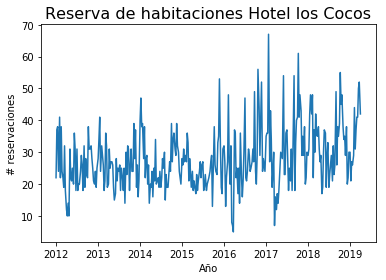

336
13


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


            #guests
time               
2019-01-01       30
2019-01-08       21
2019-01-15       27
2019-01-22       26
2019-02-01       29
2019-02-08       44
2019-02-15       31
2019-02-22       37
2019-03-01       41
2019-03-08       41
2019-03-15       50
2019-03-22       52
2019-04-01       42
[33, 31, 33, 31, 32, 31, 31, 32, 27, 28, 29, 31, 33]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

#leer la data del excel de los huespedes.csv
data = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
plt.plot(data)
plt.title('Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel('# reservaciones')
plt.xlabel('Año')
plt.savefig('./img/serie_huespedes.png')
plt.show()

#Dividir datos de prueba y entrenamiento
y_train = data[:'2018']
y_test = data['2019':]

#Mostrar datos
print(len(y_train))
print(len(y_test))
model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=337, end=349)

#Volver entero predicho y muestra de informacion
prediction = list(map(lambda x: int(x), pred))
print(y_test)
print(prediction)




In [3]:
#calculo de MSE
rms = sqrt(mean_squared_error(y_test, prediction))
print('MSE',rms)
real=np.array(y_test)
print(real)
predi=np.array(prediction)
print(predi)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



MSE 11.438800367440365
[[30]
 [21]
 [27]
 [26]
 [29]
 [44]
 [31]
 [37]
 [41]
 [41]
 [50]
 [52]
 [42]]
[33 31 33 31 32 31 31 32 27 28 29 31 33]
